<div style="align-items: center; justify-content: space-between;">
   <img src="https://github.com/TonFLY/images/blob/main/5915-removebg-preview.png?raw=true"  align="right" alt="Semantix-logo" width="30%">

   <h1>Analise Exploratória de cartões de crédito usando SQL</h1>
   <b> por <a href="https://www.linkedin.com/in/tonfly/">Wellington Marques</a> </b>
</div>


---

## Sumário


1.   [**Dados**](#dados)
2.   [**Análise Exploratória**](#EDA)
3.   [**Análise dos dados**](#analysis)
4.   [**Conclusão**](#conclusao)



<a id='dados'></a>
# 1.0 **Dados**

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

<a id='EDA'><a/>
# 2.0 **Análise Exploratória**

**Exploração de dados:**
>A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos explorar!

**Qual a quantidade de informações temos na nossa base de dados?**

Query:

```
SELECT count(*) FROM credito
```
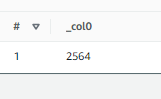



**Agora precisamos verificar como são os dados**

Query:
```
SELECT * FROM credito LIMIT 10;
```
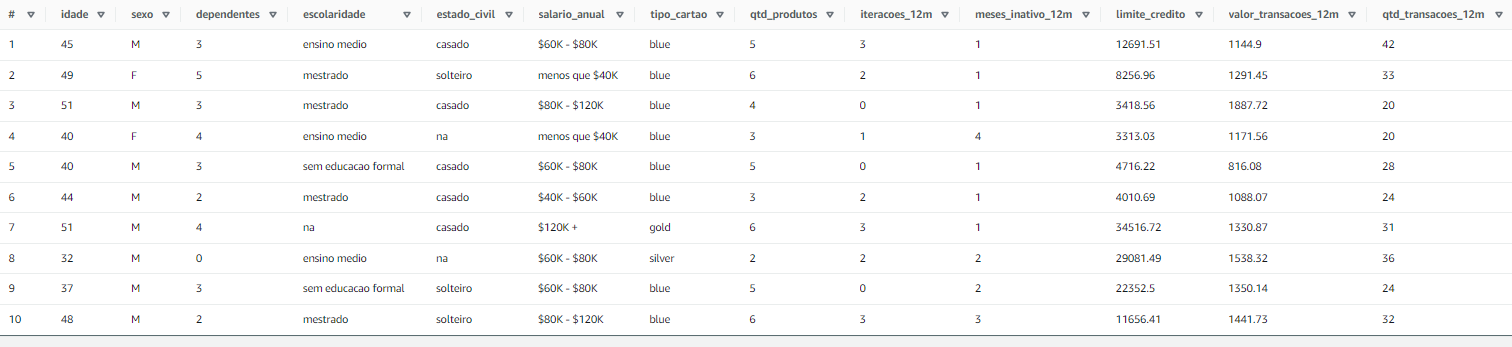
>Foi possivel verificar que temos valores nulos (na), precisamos olhar mais perto para os valores de cada coluna.



**Verificando os tipos de dados**

Query:

```
  DESCRIBE credito
```



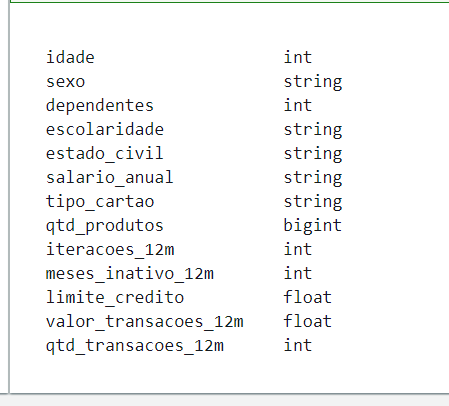

> Agora conseguimos verificar qual tipo de dado cada coluna possui, agora vamos verificar os dados não númericos.

**Quais são os tipos de escolaridade disponiveis no dataset?** Iremos verificar cada **valor unico** na coluna **escolaridade.**

Query:


```
SELECT DISTINCT escolaridade FROM credito
```



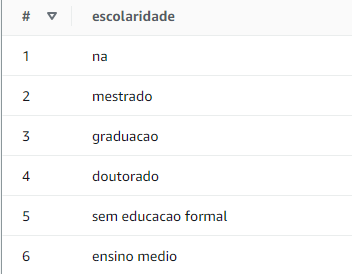

> Iniciamente ja notamos que possui valores nulos e diversos niveis de escolaridade.

> Iremos tratar esses dados nulos no futuro.

Continuaresmos a explorar as colunas para verificar se a dados nulos.

**Quais são os tipos de estado_civil disponíveis no dataset?**

Query:

```
SELECT DISTINCT estado_civil FROM credito
```



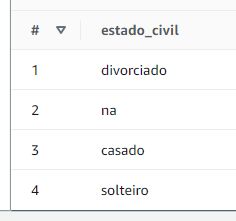

> Mais uma vez encontramos dados faltantes.

**Quais são os tipos de salario_anual disponíveis no dataset?**

Query:

```
SELECT DISTINCT salario_anual FROM credito
```



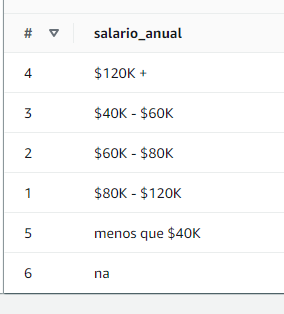

> Percebemos que os salarios não possui valores exatos e sim faixa salarial, tambem possui valores nulos.

**Quais os tipos de cartões disponiveis?**

Query:

```
SELECT DISTINCT tipo_cartao FROM credito
```



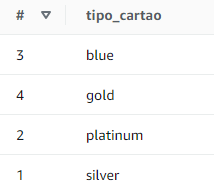

> Maravilha, sem dados faltantes.

<a id='analysis'></a>
# 3.0 **Análise dos dados**

Agora que exploramos os dados e entendemos quais são as informaçoes disponiveis no nosso banco de dados, podemos fazer a analise das informações para buscar entender o que está acontecendo no banco de dados:

**Quantos clientes temos de cada faixa salarial?**

Query:

```
select count(*), salario_anual from credito group by salario_anual
```



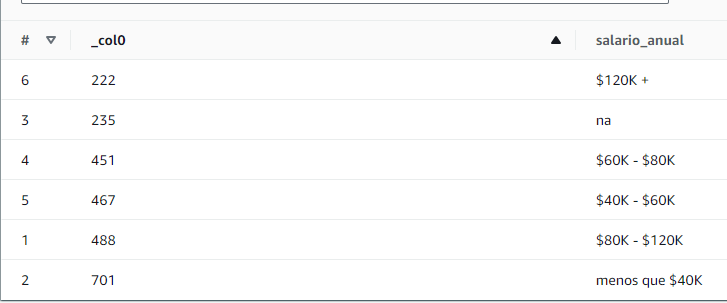

> * Percebemos que a quantidade de clintes que recebem menos de 40k por ano é superior aos demais faixas salariais.
> * 235 clientes deixaram de informa a faixa salarial.

**Qual a quantidade de clientes são do sexo masculino e feminino?**

Query:

```
select count(*), sexo from credito group by sexo
```



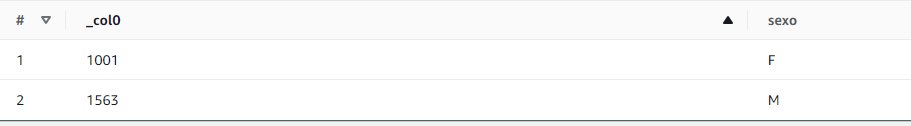

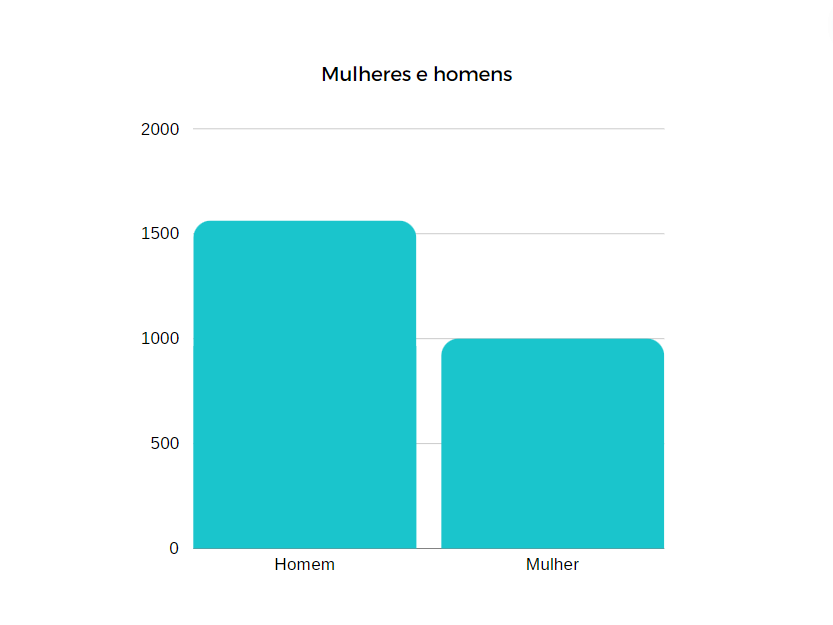

> Wow, a quantidade de clientes homens é cerca de 50% maior que de mulheres.

**Qual a idade de nossos clientes?**


Query:

```
 select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo
```



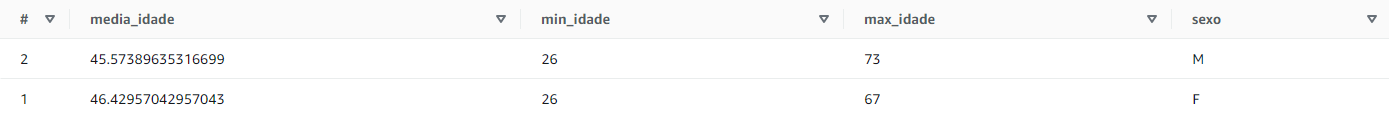

> Notamos que a idade dos clientes do sexo femenino e masculino são bem proximos.

**Qual a maior e menor transação dos clientes?**

Query:

```
 select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from credito
```



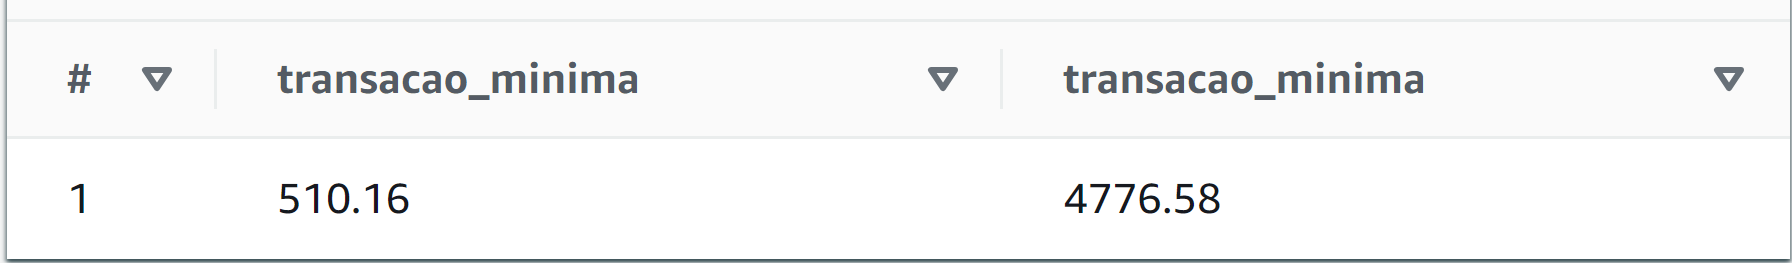

> Nesse banco de dados as transações no período de 12 meses o menor e maior transição é respectivamente de 510,16 a 4776,58

**Quais as características dos clientes que possuem os maiores creditos?**

Query:

```
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10
```



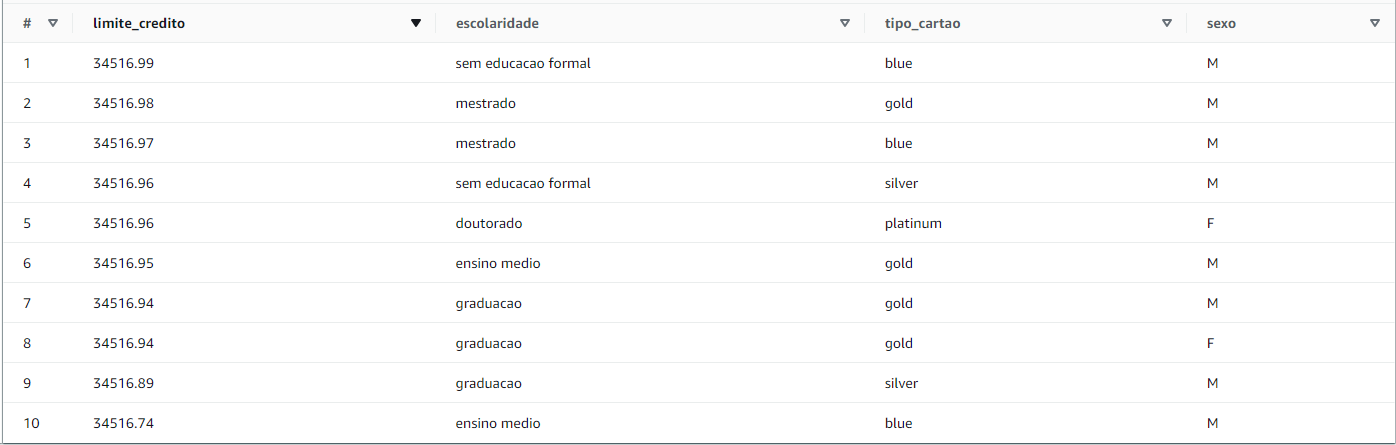

> Parece que escolaridade não possui impacto sobre o limite de crédito, pois o maior limite de crédito está direcionado a um cliente sem educação formal. O tipo de cartão também parece não está relacionado ao limite, pois notamos que o maior limite é um cartão tipo blue.

**Quais as características dos clientes que possuem os menores creditos?**

Query:

```
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc
```



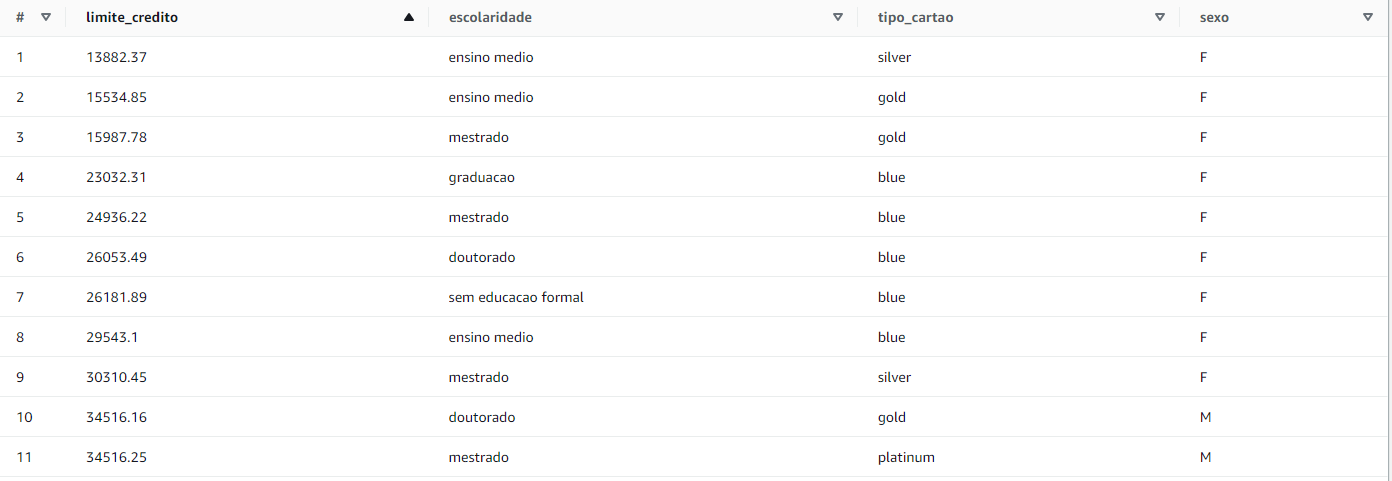

> Dessa vez conseguimos perceber que entre os 10 menores limite de credito não tem nem um cartão platinum, o mesmo so aparece em 11º. Outro ponto em levar em consideração é que os menores limites de credito são de mulheres.

**Será que as mulheres gastam mais?**

Query:

```
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo
```



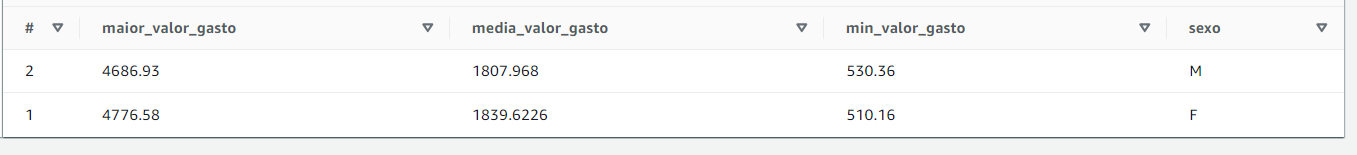

> Não há diferença significativa entre os gatos de homens e mulheres.

**O salário impacta no limite?**

Query:

```
select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc
```



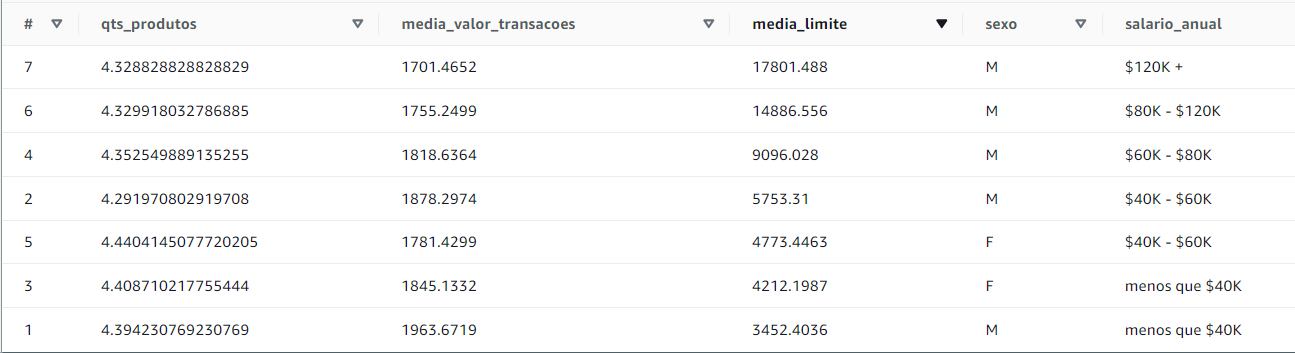

> Conseguimes perceber que sim, o salario impacta diretamente no limite de credito.

Por fim,

**Mulheres recebem salarios menores que homens?**

Query:

```
SELECT COUNT(*), salario_anual, sexo FROM credito GROUP BY sexo, salario_anual;

```



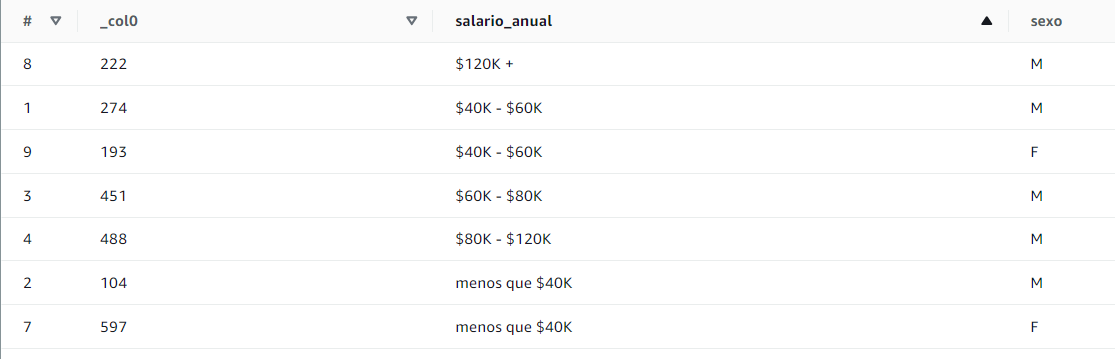

> Infelizmente é verdade, neste banco de dados mulheres recebem salarios menores que homens, impactando diretamente no limete de credito.

<a id='conclusao'></a>
# 4.0 **Conclusão**

A análise do dataset revelou insights importantes sobre a base de clientes e seus cartões de crédito, destacando disparidades de gênero significativas que demandam ações para promover equidade e inclusão.

* **Disparidade de Renda e Limite de Crédito:** Existe uma clara diferença salarial entre homens e mulheres, com as mulheres recebendo salários anuais consideravelmente menores. Essa disparidade se reflete nos limites de crédito, com os homens recebendo limites mais altos, independentemente da escolaridade.
* **Concentração de Renda:** A maioria dos clientes, independentemente do gênero, possui renda anual de até 40 mil, o que pode indicar a necessidade de produtos e serviços financeiros mais adequados a essa faixa de renda.

**Recomendações:**
* **Desenvolver Produtos para Faixas de Renda Específicas:** Criar produtos e serviços financeiros que atendam às necessidades da maioria dos clientes, que possuem renda anual de até 40 mil, como cartões com benefícios relevantes para essa faixa de renda e programas de educação financeira.
* **Revisão da Política de Limites de Crédito:** É crucial realizar uma análise aprofundada dos critérios utilizados para definir os limites de crédito, buscando eliminar vieses de gênero e garantir que as mulheres tenham acesso a limites justos e compatíveis com sua renda e perfil financeiro.
* **Comunicação Transparente:** Adotar uma comunicação clara e transparente sobre os critérios de concessão de crédito e os benefícios de cada produto, garantindo que todos os clientes tenham acesso às mesmas informações e oportunidades.
* **Monitoramento Contínuo:** Implementar um sistema de monitoramento contínuo para identificar e corrigir possíveis disparidades de gênero em relação aos produtos, serviços e limites de crédito oferecidos.

Ao implementar essas recomendações, a instituição financeira estará contribuindo para um sistema financeiro mais justo e inclusivo, oferecendo oportunidades iguais para todos os clientes, independentemente do gênero.